# Cogo Ride Exploration and Visualization 2022
## by Fisayo Sofuwa

## Investigation Overview


>The [Cogo Bike](https://en.wikipedia.org/wiki/CoGo) Share system launched in July 2013 with a network of 300 bicycles and 30 stations located throughout downtown Columbus. Today, CoGo boasts around 90 stations and 600 bikes serving Columbus, Bexley, Upper Arlington, Grandview Heights and Easton. The system provides Columbus residents and visitors an additional transportation option for getting around town that is fun, easy, and affordable. 

>**N.B**: The data used for this exploration is data from **`January`** to **`August`**.


## Dataset Overview

> The dataset used for this exploratory analysis consists of monthly individual trip data from January 2020 to August 2022 in CSV format covering the greater Columbus area, raw data is available [here](https://cogo-sys-data.s3.amazonaws.com/index.html). Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (16,6)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trips22 = pd.read_csv('cogo_trips_2022.csv')

# drop missing values in end_station_id and end_station_name, and end_lat and end_lng.
trips22 = trips22.dropna(axis=0)

trips22['started_at'] = pd.to_datetime(trips22['started_at'])
trips22['ended_at'] = pd.to_datetime(trips22['ended_at'])

trips22['duration_minute'] = trips22['ended_at'] - trips22['started_at']
trips22['duration_minute'] = trips22['duration_minute'].dt.components.minutes

trips22['start_date'] = trips22['started_at'].dt.date
trips22['start_hourofday'] = trips22['started_at'].dt.hour
trips22['start_dayofweek'] = trips22['started_at'].dt.day_name()
trips22['start_month'] = trips22['started_at'].dt.month_name()

trips22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29242 entries, 0 to 35886
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             29242 non-null  object        
 1   rideable_type       29242 non-null  object        
 2   started_at          29242 non-null  datetime64[ns]
 3   ended_at            29242 non-null  datetime64[ns]
 4   start_station_name  29242 non-null  object        
 5   start_station_id    29242 non-null  object        
 6   end_station_name    29242 non-null  object        
 7   end_station_id      29242 non-null  object        
 8   start_lat           29242 non-null  float64       
 9   start_lng           29242 non-null  float64       
 10  end_lat             29242 non-null  float64       
 11  end_lng             29242 non-null  float64       
 12  member_casual       29242 non-null  object        
 13  duration_minute     29242 non-null  int64     

## User Types and Their Monthly Usage
> Members contributed the majority of the bike usage in 2022 between January to August with value about 62.6%, while 37.4% were comsumed by casual users. The bike sharing usage tend to increase with month except for almost same usage for January and February and decrease in August.

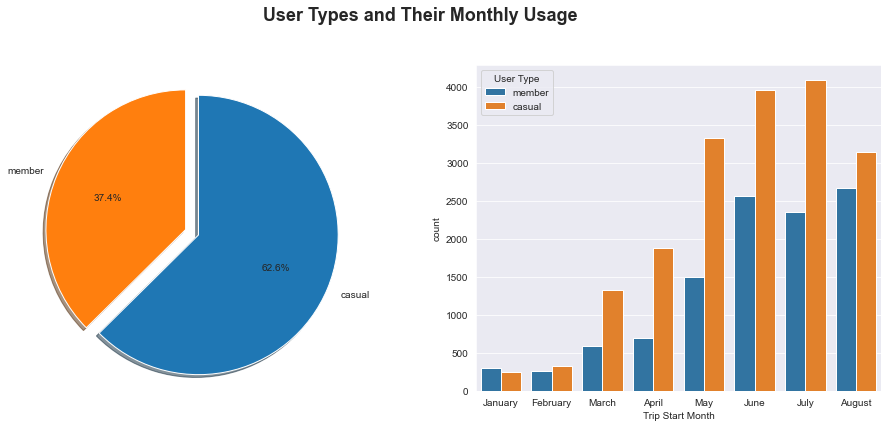

In [3]:
base_color =  sns.color_palette()[0]

plt.subplot(1, 2, 1)
sorted_vals = trips22['member_casual'].value_counts()/trips22.shape[0]
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True)
plt.axis('square')

plt.subplot(1, 2, 2)
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trips22['start_month'] = trips22['start_month'].astype(monthcat)

ax = sns.countplot(data=trips22, x='start_month', hue='member_casual')
ax.legend(title='User Type')
plt.xlabel('Trip Start Month')

plt.suptitle('User Types and Their Monthly Usage', fontsize=18, fontweight='semibold', y=1.015);

## Average Weekly Trip Duration for Members and Casuals

> Members ride much shorter/quicker trips compared to casuals on each day of the week. Both user type have increase usage from Friday to Saturday with fall between Monday to Thursday.

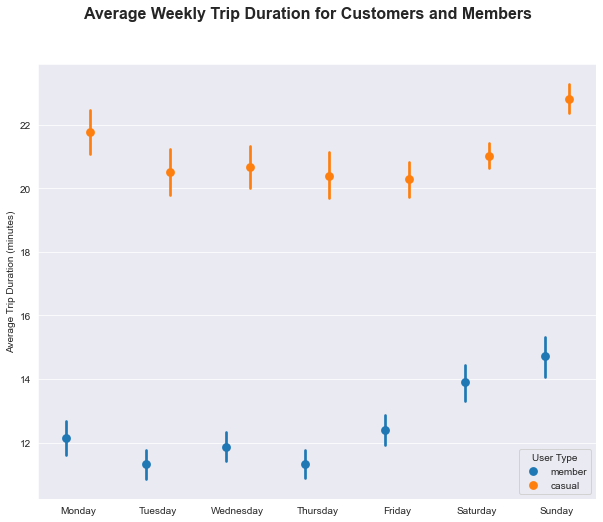

In [4]:
plt.figure(figsize=[10,8])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips22['start_dayofweek'] = trips22['start_dayofweek'].astype(weekdaycat)

ax = sns.pointplot(data=trips22, x='start_dayofweek', y='duration_minute', hue='member_casual', dodge=0.3, linestyles='')
ax.legend(title='User Type')
plt.xlabel('')
plt.ylabel('Average Trip Duration (minutes)')
plt.suptitle('Average Weekly Trip Duration for Customers and Members', fontsize=16, fontweight='semibold');

## Average Weekly Trip Duration for Ride Types

> Docked bikes seems to be the most use bike among the three bike types, with large average trip duration compared to classic and electric bikes with little difference between both.

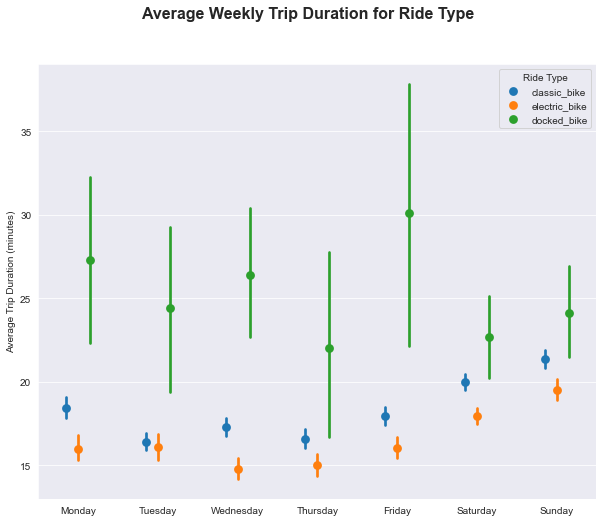

In [5]:
plt.figure(figsize=[10,8])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips22['start_dayofweek'] = trips22['start_dayofweek'].astype(weekdaycat)

ax = sns.pointplot(data=trips22, x='start_dayofweek', y='duration_minute', hue='rideable_type', dodge=0.3, linestyles='')
ax.legend(title='Ride Type')
plt.xlabel('')
plt.ylabel('Average Trip Duration (minutes)')
plt.suptitle('Average Weekly Trip Duration for Ride Type', fontsize=16, fontweight='semibold');

## Summary

> There was a lot more members using the bike sharing system than casual customers overall, of which usage inreases with month with same usage for January and February and decrease in August. Obviously different usage patterns and riding habits are observed between the two types of riders. Members and casuals used the system heavily on work days concentrated around 15-19pm, whereas casuals ride a lot over weekends for leisure/touring purposes. Members tended to have much shorter/quicker trips compared to casuals which makes member usage more efficient.

In [6]:
!jupyter nbconvert cogo_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook cogo_slide_deck.ipynb to slides
[NbConvertApp] Writing 691590 bytes to cogo_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\DeySholey\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\DeySholey\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\DeySholey\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\DeySholey\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\DeySholey\anaconda3\lib\site-packages\nbco